## BE485, Lab 12, Ex 1
 In this exercise, you will:<br>
 * <font color="blue">Read QA data</font><br>
 * <font color="blue">Extract bit flags and display them</font><br>
    - MODLAND<br>
    - AEROSOL<br>
    - MIXEDCLOUDS<br>
    - LANDWATER<br>
 * <font color="blue">Mask NDVI using flags</font><br>
    - Average values from the masked datasets <br>    

In [10]:
# Import all necessary libraries

import os
import sys
import matplotlib.pyplot as plt
import numpy as np

# Library for reading HDF files
from pyhdf.SD import SD, SDC

#Import the VIP Library
import viplab_lib5 as vip

# This is a magic function call that renders the figure in a notebook
# instead of displaying a dump of the figure object to separate window
%matplotlib inline


# User defined functions

In [11]:
#user defined functions to help with QA
#covert number to 01 string
def QA_to_U16bits(QA):
    s=bin(QA)[2::].zfill(16)
    return s

def QA_explodeU16(QA,bitStart,bitEnd=0):
    s=bin(QA)[2::].zfill(16)    
    delta=(bitEnd-bitStart)
    
    if bitEnd==0:
        ss=s[15-bitStart]
    else:
        bStart=15-(bitEnd)
        bitEnd=bStart+delta+1
        ss=s[bStart:bitEnd]
    
    value=int(ss,2)
    return value


def Band_QA_explodeU16(data,bitStart,bitEnd=0):
    #get size of input band
    nrows,ncols=data.shape
    
    #create empty band
    datares=np.zeros((nrows,ncols))
    for i in range(0,nrows):
        for j in range(0,ncols):
            #obtain pixel from QA band
            pixelQA=data[i,j]
            #extract bits from pixel
            qflag=QA_explodeU16(pixelQA,bitStart,bitEnd)
            
            #assign pixel to output array  
            datares[i,j]=qflag
    return datares

def rank_filterkeep(data,datarank,ranklist):
    #get size of input band
    nrows,ncols=data.shape

    FILL_VALUE=-13000
    
    #create empty band
    datares=np.zeros((nrows,ncols))
    for i in range(0,nrows):
        for j in range(0,ncols):
            pixelRank=datarank[i,j]
            if pixelRank in ranklist:
                datares[i,j]=data[i,j]
            else:
                datares[i,j]=FILL_VALUE
            
    return datares


## Main program starts here !
## * Read NDVI, Rank and QA from file

In [12]:
#filename to read
filename = './Data/MOD13A2.A2020065.h08v05.006.2020082012602.hdf'


# Open HDF file for reading
hdf = SD(filename, SDC.READ)

# Get information about the datasets
bandsInfo=hdf.datasets();

#Displaying basic info
print("\nDatasets name, #rows, #cols, datatype, index")
for key in bandsInfo.keys():
  print(key, bandsInfo[key])


sdsNDVI= hdf.select('1 km 16 days NDVI')
bandNDVI=sdsNDVI.get()
sdsRANK= hdf.select('1 km 16 days pixel reliability')
bandRANK=sdsRANK.get()
sdsQA= hdf.select('1 km 16 days VI Quality')
bandQA=sdsQA.get()

sdsVZA= hdf.select('1 km 16 days view zenith angle')
bandVZA=sdsVZA.get()
#close hdf file
hdf.end()


Datasets name, #rows, #cols, datatype, index
1 km 16 days NDVI (('YDim:MODIS_Grid_16DAY_1km_VI', 'XDim:MODIS_Grid_16DAY_1km_VI'), (1200, 1200), 22, 0)
1 km 16 days EVI (('YDim:MODIS_Grid_16DAY_1km_VI', 'XDim:MODIS_Grid_16DAY_1km_VI'), (1200, 1200), 22, 1)
1 km 16 days VI Quality (('YDim:MODIS_Grid_16DAY_1km_VI', 'XDim:MODIS_Grid_16DAY_1km_VI'), (1200, 1200), 23, 2)
1 km 16 days red reflectance (('YDim:MODIS_Grid_16DAY_1km_VI', 'XDim:MODIS_Grid_16DAY_1km_VI'), (1200, 1200), 22, 3)
1 km 16 days NIR reflectance (('YDim:MODIS_Grid_16DAY_1km_VI', 'XDim:MODIS_Grid_16DAY_1km_VI'), (1200, 1200), 22, 4)
1 km 16 days blue reflectance (('YDim:MODIS_Grid_16DAY_1km_VI', 'XDim:MODIS_Grid_16DAY_1km_VI'), (1200, 1200), 22, 5)
1 km 16 days MIR reflectance (('YDim:MODIS_Grid_16DAY_1km_VI', 'XDim:MODIS_Grid_16DAY_1km_VI'), (1200, 1200), 22, 6)
1 km 16 days view zenith angle (('YDim:MODIS_Grid_16DAY_1km_VI', 'XDim:MODIS_Grid_16DAY_1km_VI'), (1200, 1200), 22, 7)
1 km 16 days sun zenith angle (('YDim:MODIS

## * Display NDVI, RANK and QA bands 

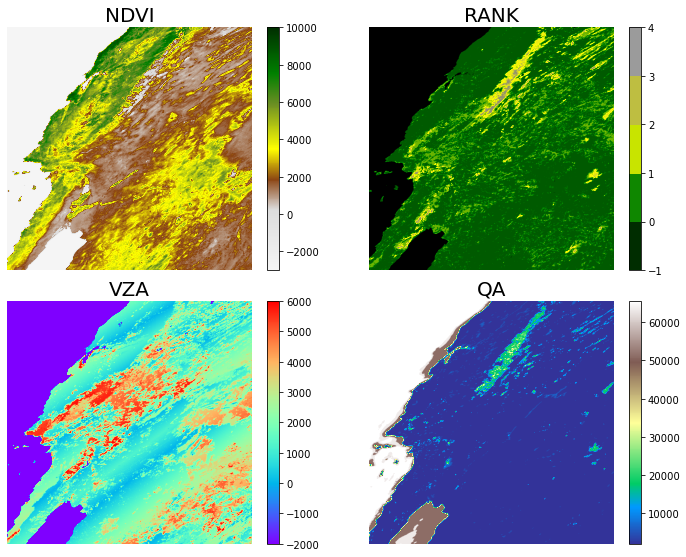

In [13]:
#Display input data using custom colors
# input data
nrows=1200
ncols=1200
# use NDVI custom color map
valueList  = [-0.6, -0.2, 0.,0.2, 0.5, 0.7, 1]  # Define the color nodes - cutoff points
colorList = ["whitesmoke","gainsboro","saddlebrown","yellow","olivedrab","green","#003000"]  # Define the colors for each range 
cmapNDVI=vip.createColorMap([valueList,colorList],plt)

"""
plt.figure()
f, plot = plt.subplots(2, 2,figsize=(15,15))

LUT=vip.LUT_getdefault('NOYES')
ImageLUT=vip.getImage_fromLUT(MixedClouds,LUT)
im=plot[0,0].imshow(bandNDVI, cmap=cmapNDVI)
plot[0,0].set_title("NDVI with colorMap")
plot[0,0].axis('off')
#plot[0,0].colorbar()


#Load a LUT color for RANK
#RankLUT=vip.LUT_getdefault("RANK")
#ImageLUT=vip.getImage_fromLUT(bandRANK,RankLUT)

"""


"""
plot[0,1].imshow(bandRANK,cmap=cmapRANK,norm=norm)
plot[0,1].set_title("RANK")
plot[0,1].axis('off')

plot[1,0].imshow(bandQA)
plot[1,0].set_title("QA")
plot[1,0].axis('off')
#plot[1,0].colorbar()

plot[1,1].imshow(bandVZA)
plot[1,1].set_title("VZA")
plot[1,1].axis('off')
"""

# Create a canvas for a 1xRow -  2xCols figures
fig, ax = plt.subplots(2, 2,figsize=(10,8))

#Show NDVI map/Image
im=ax[0,0].imshow(bandNDVI, cmap=cmapNDVI)
plt.colorbar(im,ax=ax[0,0])
ax[0,0].set_aspect('auto')
ax[0,0].set_title("NDVI",fontsize=20)
ax[0,0].axis('off')


# Set Rank custom color map
valueList  = [-1,0,1,2,3,4]  # Define the color nodes 
colorList = ["black","green","yellow","gray","white","red"]  # Define the colors for each node 
cmapRANK=vip.createColorMap([valueList,colorList],plt)

rankClass = np.linspace(-1, 4, 6)
norm=plt.Normalize(-1,6)

#Show Rank map/Image
ax[0,1].set_title("RANK",fontsize=20)
im=ax[0,1].imshow(bandRANK,cmap=cmapRANK,norm=norm)
plt.colorbar(im,ax=ax[0,1],ticks=rankClass,boundaries=rankClass)
ax[0,1].set_aspect('auto')
plt.tight_layout(h_pad=1)
ax[0,1].axis('off')


#Show View Angle
im=ax[1,0].imshow(bandVZA,cmap="rainbow",vmin=-2000, vmax=6000)
plt.colorbar(im,ax=ax[1,0])
ax[1,0].set_aspect('auto')
ax[1,0].set_title("VZA",fontsize=20)
ax[1,0].axis('off')


#Show QA
im=ax[1,1].imshow(bandQA,cmap="terrain")
plt.colorbar(im,ax=ax[1,1])
ax[1,1].set_aspect('auto')
ax[1,1].set_title("QA",fontsize=20)
ax[1,1].axis('off')

plt.show()

## Masking values and computing stats

In [18]:
print("Computing some stats:")

#compute average NDVI from full image
avg=bandNDVI.mean()
print("Full image irrespective of data quality")
print("Avg NDVI :",avg/10000.0)

print("However, the image contains ocean, invalid values,etc..so let us remove them.")
validNDVI=bandNDVI[(bandNDVI>-2000) & (bandNDVI<=10000)]
avg=np.mean(validNDVI)
print("\nValid NDVI avg=",avg/10000.0)

print("How about data that is of high quality only")
print("\nCompute NDVI avg when Rank=0 ")
# MODIS RANK categories
RANK_GOOD=0
RANK_MARGINAL=1
RANK_SNOWICE=2
RANK_CLOUDY=3

#Apply rank mask to filter only GOOD data
NDVI_GOOD=rank_filterkeep(bandNDVI,bandRANK,[RANK_GOOD])
avg=np.mean(NDVI_GOOD[NDVI_GOOD>-2000])
print("Avg NDVI when RANK is [GOOD] =",avg/10000.0)


#over snow/ice
NDVI_SNOWICE=rank_filterkeep(bandNDVI,bandRANK,[RANK_SNOWICE])
avg=np.mean(NDVI_SNOWICE[NDVI_SNOWICE>-2000])
print("Avg NDVI when RANK is [SNOWICE] =", avg/10000.0)

Computing some stats:
Full image irrespective of data quality
Avg NDVI : 0.1668145367361111
However, the image contains ocean, invalid values,etc..so let us remove them.

Valid NDVI avg= 0.29439895950956263
How about data that is of high quality only

Compute NDVI avg when Rank=0 
Avg NDVI when RANK is [GOOD] = 0.312909104940891
Avg NDVI when RANK is [SNOWICE] = 0.11461916715730879


## * Extract QA bit flags
### a) understanding QA 

In [29]:

print("Example bit extraction for a value of QA=2116")
QA=2116

print("Displaying QA as bits:")
bitstring=QA_to_U16bits(QA)
print("QA=",QA)
print("bits=",bitstring)

print("\nExtracting individual flags:")
print("MODLAND [0-1]=",QA_explodeU16(QA,0,1))
print("VI_usefulnes [2-5]=",QA_explodeU16(QA,2,5))
print("Aerosol quantity [6-7]=",QA_explodeU16(QA,6,7))  
print("Land/Water flag [11-13]=",QA_explodeU16(QA,11,13)) 
print("Possible snow/ice [14]=",QA_explodeU16(QA,14,14))  



Example bit extraction for a value of QA=2116
Displaying QA as bits:
QA= 2116
bits= 0000100001000100

Extracting individual flags:
MODLAND [0-1]= 0
VI_usefulnes [2-5]= 1
Aerosol quantity [6-7]= 1
Land/Water flag [11-13]= 1
Possible snow/ice [14]= 0


### b) Extracting QA for the full QA band

In [30]:
print("Extacting QA from full band ... it may take sometime, wait")
Start=vip.startTime()
print("MODLAND flag")
Modland=Band_QA_explodeU16(bandQA,0,1)

print("Aerosol quantity flag")
AerosolQuantity=Band_QA_explodeU16(bandQA,6,7)

print("Mixed clouds flag")
MixedClouds=Band_QA_explodeU16(bandQA,10)


print("Extractint QA Land/Water flag")
LandWater=Band_QA_explodeU16(bandQA,11,13)

vip.endTime(Start)

Extacting QA from full band ... it may take sometime, wait
MODLAND flag
Aerosol quantity flag
Mixed clouds flag
Extractint QA Land/Water flag
 5.91  seconds


### c) Display QA bit flags

Plotting images... wait a couple of minutes


(-0.5, 1199.5, 1199.5, -0.5)

<Figure size 432x288 with 0 Axes>

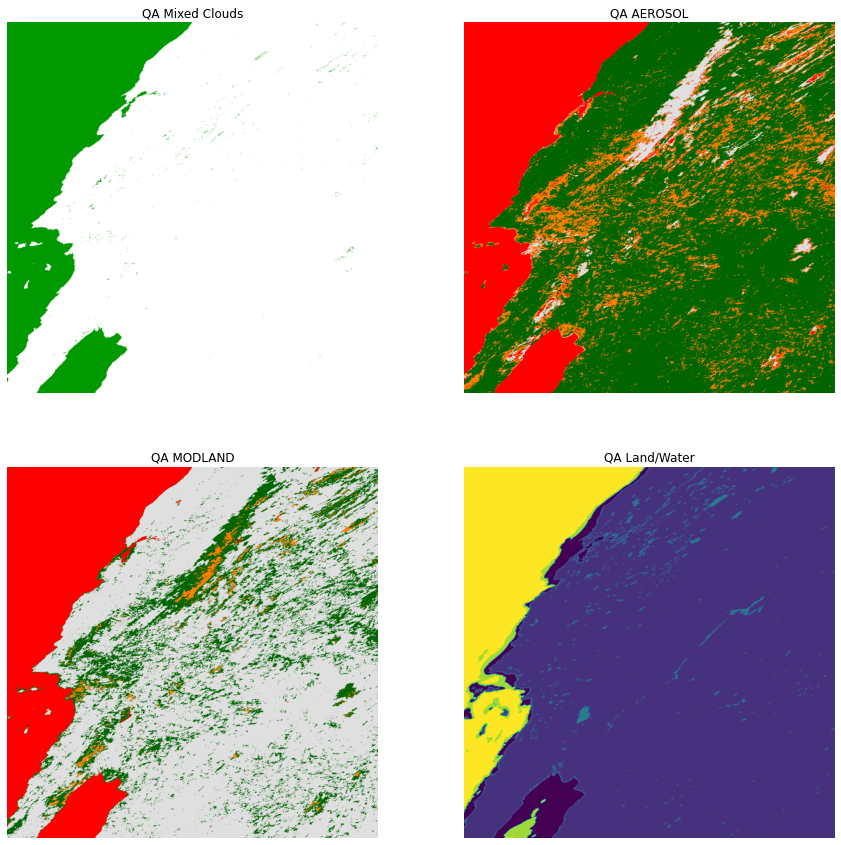

In [31]:
print("Plotting images... wait a couple of minutes")
# Display layers for each method

plt.figure()
f, plot = plt.subplots(2, 2,figsize=(15,15))

LUT=vip.LUT_getdefault('NOYES')
ImageLUT=vip.getImage_fromLUT(MixedClouds,LUT)
im=plot[0,0].imshow(ImageLUT)
plot[0,0].set_title("QA Mixed Clouds")
plot[0,0].axis('off')

LUT=vip.LUT_getdefault('AEROSOL')
ImageLUT=vip.getImage_fromLUT(AerosolQuantity,LUT)
im=plot[0,1].imshow(ImageLUT)
plot[0,1].set_title("QA AEROSOL")
plot[0,1].axis('off')

#for no using AEROSOL lut for MODLAND
#create your own for MODLAND
LUT=vip.LUT_getdefault('AEROSOL')
ImageLUT=vip.getImage_fromLUT(Modland,LUT)
im=plot[1,0].imshow(ImageLUT)
plot[1,0].set_title("QA MODLAND")
plot[1,0].axis('off')


im=plot[1,1].imshow(LandWater)
plot[1,1].set_title("QA Land/Water")
plot[1,1].axis('off')


## Homework (see presentation)

### a) Extract: Possible Shadow, possible snow/ice, and adjacent cloud

In [18]:
#put here your code 



### b) Display your extracted bands here

In [ ]:
#put your code here



### c) Create a LUT color for MODLAND QA Layer (and display it)

In [ ]:
#put your code here



## d) Compute AVG NDVI when AEROSOL=Low or Average, compute AVG NDVI by MODLAND classes

In [19]:
#put here you code 

In [19]:
print("program ended.")

program ended.
